# Machine learning with SVM Supervised model

In [15]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest

from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
data = load_boston()

df = pd.DataFrame(data.data)
df.head()

data.feature_names



## Scaling the data with min-max scaler for the regression purpose.
mi = MinMaxScaler()
scaled_data = mi.fit_transform(data.data)

## instantiating the Select-K-Best with the value k=9 
selector = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_regression, k=9)

## Assigning to the variable for the k best features from the scaled data.
feat_selection = selector.fit_transform(scaled_data, data.target)

## Understanding the concept of selecting K feature by reviewing relationship of scaled data to target data.
## if equal to 0 means, scaled data independent with target data.
relation_with_target = feature_selection.mutual_info_regression(scaled_data, data.target)

print(relation_with_target)
print(feat_selection[0])
print(scaled_data[0])



[0.33471819 0.17695628 0.46237974 0.03460522 0.46374973 0.52878847
 0.31025372 0.29677941 0.21303279 0.35465881 0.44576773 0.15917328
 0.66220116]
[0.         0.06781525 0.31481481 0.57750527 0.64160659 0.26920314
 0.20801527 0.28723404 0.08967991]
[0.         0.18       0.06781525 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
 0.08967991]


# Performing train test split

In [2]:

X_train, X_test, y_train, y_test = train_test_split(feat_selection,
                                                   data.target,
                                                   random_state = 4)

# SVR analysis

In [3]:
param_grid = {'C':[10, 20, 100, 120],
              'epsilon': [0.1, 0.3, 0.4, 0.5],
              'kernel' : ['linear', 'poly', 'rbf']
              }
grid = GridSearchCV(SVR(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy : {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


Best cross-validation accuracy : 0.838
Best parameters:  {'C': 120, 'epsilon': 0.5, 'kernel': 'rbf'}


## Implementing Best parameter to the SVR model

In [4]:
svm = SVR(kernel = 'rbf', C=120, epsilon = 0.5)
svm.fit(X_train, y_train)
print("Training set score: {:.2f}".format(svm.score(X_train,y_train)))
print("Test set score: {:.2f}".format(svm.score(X_test,y_test)))
# if model is over fitting reduce gamma

Training set score: 0.91
Test set score: 0.91


# Gradient boosting regressor For Scale Data

In [5]:
param_grid1 = {'learning_rate': [0.01,0.1,0.5,0.7],
              'alpha' : [0.1,0.5,0.9],
              'max_depth': [4,5,6,7],
              'max_leaf_nodes': [4,5,6,7,8]}
grid1 = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid= param_grid1,cv=10)
grid1.fit(X_train, y_train)
print("Best cross-validation accuracy : {:.3f}".format(grid1.best_score_))
print("Best set score: {:.3f}".format(grid1.score(X_test, y_test)))
print("Best parameters: ", grid1.best_params_)

Best cross-validation accuracy : 0.875
Best set score: 0.860
Best parameters:  {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 8}


### With the best parameter

In [6]:
gbr = GradientBoostingRegressor(alpha=0.1,learning_rate=0.1, max_depth=5, max_leaf_nodes=8)
gbr.fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(gbr.score(X_test,y_test)))


Training set score: 0.98
Test set score: 0.87


# Gradient Boosting without tunning and Without Scalling

In [7]:
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target,test_size=0.25,random_state=5)
print(train_X.shape, train_y.shape)

(379, 13) (379,)


Training set score: 0.98
Test set score: 0.90


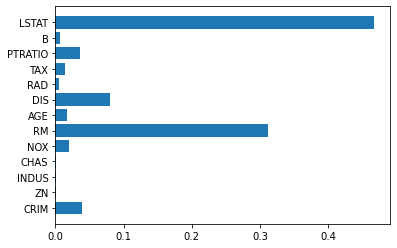

In [8]:
gbr1 = GradientBoostingRegressor()
gbr1.fit(train_X, train_y)
print("Training set score: {:.2f}".format(gbr1.score(train_X, train_y)))
print("Test set score: {:.2f}".format(gbr1.score(test_X, test_y)))
plt.barh(range(1,14),gbr1.feature_importances_)
plt.yticks(range(1,14), data.feature_names);


### GradientBoosting with parameter tunning

In [10]:
param = {'learning_rate': [0.01,0.1,0.5,0.7],
              'n_estimators':[100, 300, 500, 800],
        'max_features': [1,2,3,4,5,6,7,8,9]}
grid1 = GridSearchCV(GradientBoostingRegressor(loss='ls',random_state=0), param_grid= param,cv=5)
grid1.fit(train_X, train_y)
print("Best cross-validation accuracy : {:.3f}".format(grid1.best_score_))
print("Best parameters: ", grid1.best_params_)

Best cross-validation accuracy : 0.882
Best parameters:  {'learning_rate': 0.01, 'max_features': 8, 'n_estimators': 800}


In [12]:
gb = GradientBoostingRegressor(learning_rate=0.01, max_features=8, n_estimators= 800, loss='ls',random_state=0)
gb.fit(train_X, train_y)
print("Training set score: {:.2f}".format(gb.score(train_X, train_y)))
print("Test set score: {:.2f}".format(gb.score(test_X, test_y)))

Training set score: 0.97
Test set score: 0.91


## Conclusion with regression model
- From above two model Although the Accuracy is high with the Gradient Boosting Regressor, It shows the overfiting model and generalization of the model is not good for the alien data. However, SVR model's accuracy is good along with its generalization score. Hence, SVR model is choosen among above two models.

# An example for Classification

In [3]:
titanic = pd.read_csv("train.csv")
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic = titanic.drop(labels=['Name','Ticket','Cabin','PassengerId'], axis=1)
titanic['Age'] = titanic['Age'].fillna((titanic['Age'].mean()))
titanic = titanic.dropna()

le= LabelEncoder()
titanic['Embarked']=le.fit_transform(titanic.Embarked)
titanic['Sex']=titanic.Sex.map({'male':0,'female':1})
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.0 KB
None


In [5]:
X1, y1 = titanic.iloc[:,1:] , titanic.iloc[:,0]
X_sample , y_sample = SMOTE().fit_sample(X1,y1)

## Scalling the data with min-max scaler
scale = MinMaxScaler()
titanic_scale_data = scale.fit_transform(X_sample)

## Fitting the data in the model
svc = SVC()
svc.fit(titanic_scale_data, y_sample)

# Checking whole dataset without parameter tuning
print(f"Training data set : {svc.score(titanic_scale_data,y_sample)}")

Training data set : 0.7805100182149363


In [6]:
# performing train test split
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(titanic_scale_data, y_sample, random_state = 5)

X_train_titanic.shape

# preparing other model for testing the alien data in the model
svc1 = SVC()
svc1.fit(X_train_titanic, y_train_titanic)
print(f"Training set score: {svc1.score(X_train_titanic, y_train_titanic)}")
print(f"Test set score: {svc1.score(X_test_titanic, y_test_titanic)}")

Training set score: 0.7679222357229648
Test set score: 0.8145454545454546


### parameter tunining with grid search cv

In [9]:
para = {"C": [ 1, 10, 100],
        'gamma': ['scale', 'auto'],
       'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid3 = GridSearchCV(SVC(), param_grid= para, cv = 5)
grid3.fit(X_train_titanic, y_train_titanic)
print(f"best parameter: {grid3.best_params_}")

best parameter: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [11]:
svc4 = SVC(kernel= 'rbf', C = 100, gamma = 'scale' )
svc4.fit(X_train_titanic, y_train_titanic)
print(f" Training set score: {svc4.score(X_train_titanic, y_train_titanic)}")
print(f" Test set score: {svc4.score(X_test_titanic, y_test_titanic)}")

 Training set score: 0.8286755771567437
 Test set score: 0.8145454545454546


## using pipe for above mention code


In [19]:
pipe = Pipeline([('scale', MinMaxScaler()),
                    ('svm', SVC(kernel= 'rbf', C = 100, gamma='scale', random_state=4))])

pipe.fit(X_train_titanic, y_train_titanic)
print(f" Training set score: {pipe.score(X_train_titanic, y_train_titanic)}")
print(f" Test set score: {pipe.score(X_test_titanic, y_test_titanic)}")

 Training set score: 0.827460510328068
 Test set score: 0.8145454545454546


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       138
           1       0.83      0.79      0.81       137

    accuracy                           0.81       275
   macro avg       0.82      0.81      0.81       275
weighted avg       0.82      0.81      0.81       275



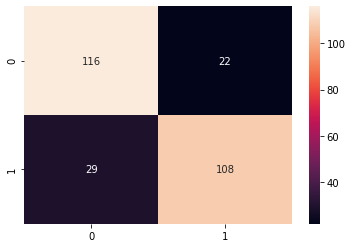

In [20]:
predict = pipe.predict(X_test_titanic)
con_mat = confusion_matrix(y_test_titanic, predict)

# True survived 108(True negetive), True death 116(True positive), 
#False Survived 22(False negative), False death 29(True negative)
print(classification_report(y_test_titanic, predict))

sns.heatmap(con_mat, annot= True, fmt='g')


### conclusion on classification
- on hyperparameter tunning with the data, we got better accuracy and better generalization as well on SVC model

### Note:-

#### Regression
- linear regression
 - Ridge
 - Lasso
- Decision tree regressor
- Bagging
- pasting
- Ada Boost

#### Classification

- Logistic Regression
- Decision Tree
- Bagging
- Ada Boost
- Random forest

In order to see which model will perform good in the particular dataset, we can perform hyperparameter tunning on each model at first, and with the cross-validation score can sort list the few models. It is then put through the ensembler or voting method to select the model.